In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM,Dropout,Dense

In [333]:
# Import data
import yfinance as yf
df = yf.download('TSLA',start = '2010-01-01',end = '2024-09-07')
df = df[['Close']]

[*********************100%***********************]  1 of 1 completed


In [373]:
import time
x = np.random.random((20, 100))
y = np.random.random((20, 100))
t0 = time.time() 
for _ in range(1000):
 z = x + y
 z = np.maximum(z, 0.) 
print("Took: {0:.2f} s".format(time.time() - t0))
print(x.shape)

Took: 0.01 s
(20, 100)


In [334]:
df.head()

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000


In [335]:
df.tail()

,Close
Date,
2024-08-30,214.110001
2024-09-03,210.600006
2024-09-04,219.410004
2024-09-05,230.169998
2024-09-06,210.729996


In [336]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

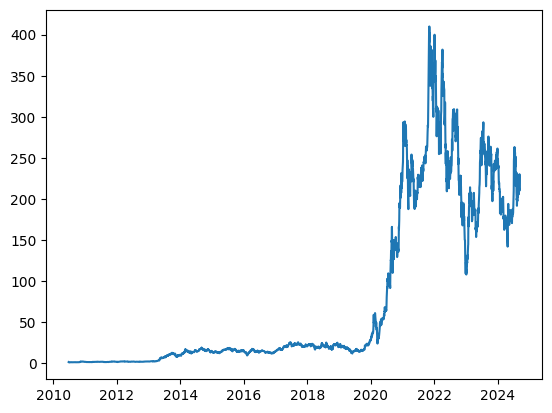

In [337]:
plt.plot(df[['Close']])
plt.show()

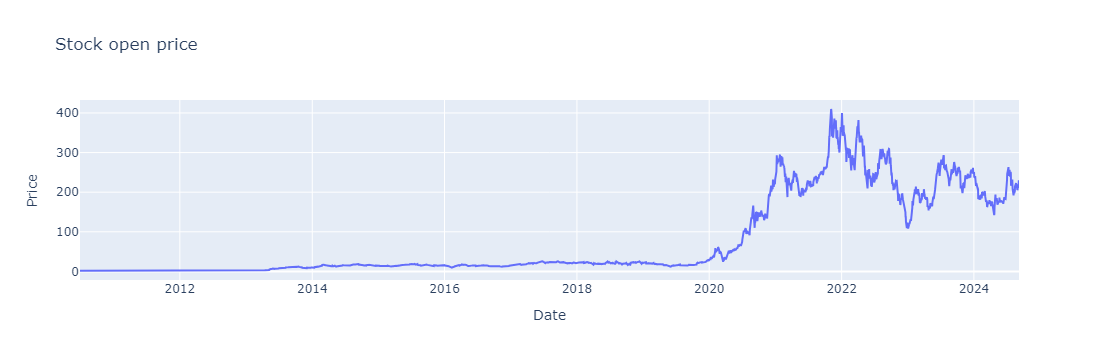

In [338]:
import plotly.graph_objects as go
# Create a figure 
fig  = go.Figure()
# Add trace for stocks open price
fig.add_trace(go.Scatter(x = df.index,y = df['Close'],mode = 'lines',name = 'open price'))
# Add titles and labels
fig.update_layout(
    title = 'Stock open price',
    xaxis_title = 'Date',
    yaxis_title = 'Price',
    hovermode = 'x unified'
)
fig.show()

In [339]:
def create_sequences(data,timestep = 60):
    X = []
    y = []
    for i in range(len(data) - timestep - 1):
        X.append(data[i:i+timestep,0])
        y.append(data[i+timestep])
    return np.array(X),np.array(y)

In [340]:
scaled_data.shape

(3572, 1)

In [341]:
time_step = 100
X,Y = create_sequences(scaled_data,time_step)

In [342]:
df.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2024-08-23', '2024-08-26', '2024-08-27', '2024-08-28',
               '2024-08-29', '2024-08-30', '2024-09-03', '2024-09-04',
               '2024-09-05', '2024-09-06'],
              dtype='datetime64[ns]', name='Date', length=3572, freq=None)

In [343]:
# Prepare data as LSTM format 
X = np.reshape(X,(X.shape[0],X.shape[1],1))

In [344]:
# Create the LSTM model 
model = Sequential()
model.add(LSTM(units = 32,return_sequences = True,input_shape = (X.shape[1],1))),
model.add(Dropout(rate = 0.20)),
model.add(LSTM(units = 32,return_sequences = False)),
model.add(Dropout(rate = 0.20)),
model.add(Dense(units = 1))

C:\Users\notebook\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [345]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 100, 32)        │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,705 (49.63 KB)

 Trainable params: 12,705 (49.63 KB)

 Non-trainable params: 0 (0.00 B)

In [346]:
Y.shape

(3471, 1)

In [347]:
# Now split the data into x train and y train and fit into the model 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 23,shuffle = False)

In [348]:
# Train the model 
history = model.fit(x_train,y_train,epochs = 30,batch_size = 32,validation_data = (x_test,y_test))

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0058 - val_loss: 0.0031
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 9.3305e-04 - val_loss: 0.0049
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 8.7467e-04 - val_loss: 0.0023
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 7.3595e-04 - val_loss: 0.0042
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 8.4683e-04 - val_loss: 0.0021
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 6.5223e-04 - val_loss: 0.0024
Epoch 8/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 7.1417e-04 - val_loss: 0.0020
Epoch 9/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 6.7858e-04 - val_loss: 0.0077
Epoch 10/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 11/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 6.3059e-04 - val_loss: 0.0017
Epoch 12/30
87/87 ━━━━━━━━━━━━━

In [349]:
# Make predictions 
prediction = model.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [350]:
prediction

array([[0.9377692 ],
       [0.9427893 ],
       [0.9408711 ],
       [0.9352024 ],
       [0.9189906 ],
       [0.90026426],
       [0.8887843 ],
       [0.8843806 ],
       [0.87529457],
       [0.8681632 ],
       [0.85598785],
       [0.8428376 ],
       [0.83351934],
       [0.8207774 ],
       [0.80971545],
       [0.7967198 ],
       [0.7902216 ],
       [0.7969061 ],
       [0.81659937],
       [0.84327644],
       [0.8685143 ],
       [0.8889067 ],
       [0.9013857 ],
       [0.90615004],
       [0.9262837 ],
       [0.9414831 ],
       [0.94425416],
       [0.9380127 ],
       [0.92315704],
       [0.91096175],
       [0.90214056],
       [0.90209883],
       [0.89567137],
       [0.8908347 ],
       [0.8845137 ],
       [0.8740156 ],
       [0.8635949 ],
       [0.84768516],
       [0.8303207 ],
       [0.8133659 ],
       [0.80178976],
       [0.7802936 ],
       [0.76062703],
       [0.7560944 ],
       [0.7584069 ],
       [0.76096475],
       [0.76180345],
       [0.766

In [351]:
# Inverse scale the data
predictions = scaler.inverse_transform(prediction)

In [352]:
predictions

array([[384.5228  ],
       [386.57562 ],
       [385.79123 ],
       [383.4732  ],
       [376.84393 ],
       [369.1864  ],
       [364.49207 ],
       [362.6913  ],
       [358.9759  ],
       [356.05975 ],
       [351.08105 ],
       [345.70367 ],
       [341.89328 ],
       [336.68292 ],
       [332.1595  ],
       [326.84534 ],
       [324.1881  ],
       [326.92154 ],
       [334.97443 ],
       [345.88315 ],
       [356.2033  ],
       [364.5421  ],
       [369.645   ],
       [371.5932  ],
       [379.8262  ],
       [386.04147 ],
       [387.17462 ],
       [384.62238 ],
       [378.54764 ],
       [373.5608  ],
       [369.95364 ],
       [369.93658 ],
       [367.3083  ],
       [365.3305  ],
       [362.74573 ],
       [358.4529  ],
       [354.19168 ],
       [347.68594 ],
       [340.58533 ],
       [333.65222 ],
       [328.91855 ],
       [320.1284  ],
       [312.08643 ],
       [310.23294 ],
       [311.17856 ],
       [312.22452 ],
       [312.56747 ],
       [314.3

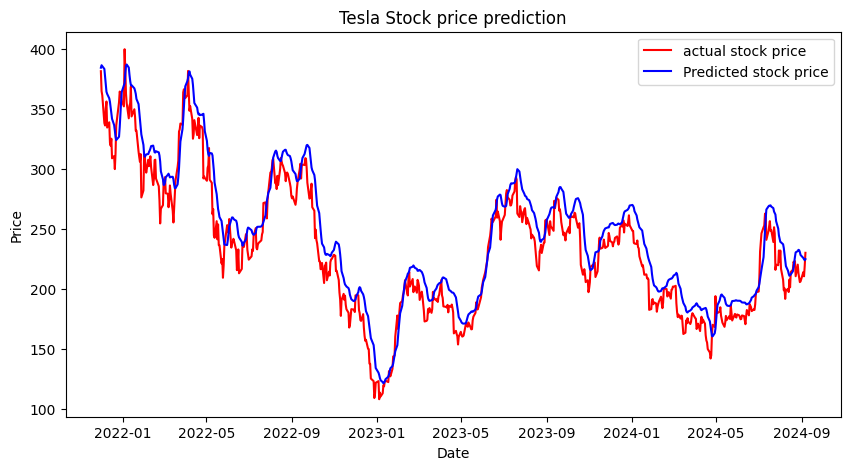

In [353]:
# Plot the predictions 
plt.figure(figsize = (10,5))
plt.plot(df.index[-len(y_test):],scaler.inverse_transform(y_test.reshape(-1,1)),color = 'red',label = 'actual stock price')
plt.plot(df.index[-len(predictions):],predictions,color = 'blue',label = 'Predicted stock price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock price prediction')
plt.legend()
plt.show()

In [354]:
# Predict stock price for next 30 days 
def predict_future(model,last_60_days,n_input):
    future_prediction = []
    current_input = last_60_days
    time_step = len(last_60_days)
    for i in range(n_input):
        prediction = model.predict(np.reshape(current_input,(1,time_step,1)))
        future_prediction.append(prediction[0][0])
        current_input = np.append(current_input[1:],prediction[0][0]) # sliding window for future prediction 
    return np.array(future_prediction)

In [355]:
# Use the last 60 days from the original dataset 
last_60_days = scaled_data[-60:]
n_input = 60
# Predict the next 60 days 
predictions = predict_future(model,last_60_days,n_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━

In [356]:
#Convert back to orignal scale 
t

In [357]:
# Create dataframe to visualize prediction 
from datetime import timedelta
last_date = df.index[-1]
future_dates = [last_date + timedelta(days = i) for i in range(1,61)]
dataset_prediction = pd.DataFrame(future_predictions,index = future_dates,columns = ['Predicted_close'])

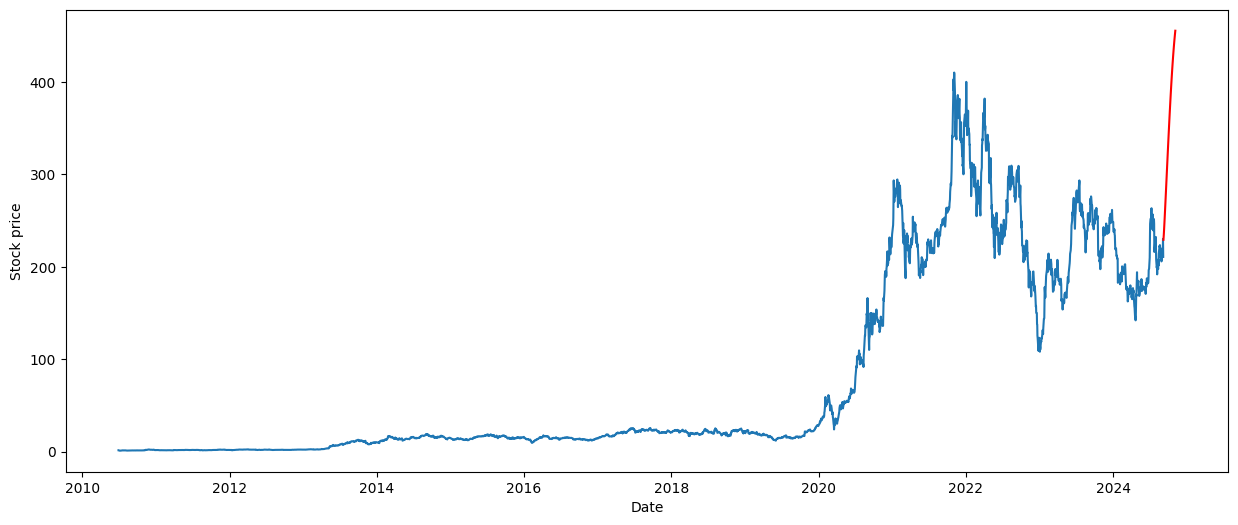

In [358]:
# Visualize the dataset 
plt.figure(figsize = (15,6))
plt.plot(df['Close'],label = 'Historic data prices')
plt.plot(dataset_prediction['Predicted_close'],label = 'Predicted_data',color = 'red')
plt.xlabel('Date')
plt.ylabel('Stock price')
plt.show()

In [359]:
last_2_months = df[-60:]
combined_df = pd.concat([last_2_months,dataset_prediction])

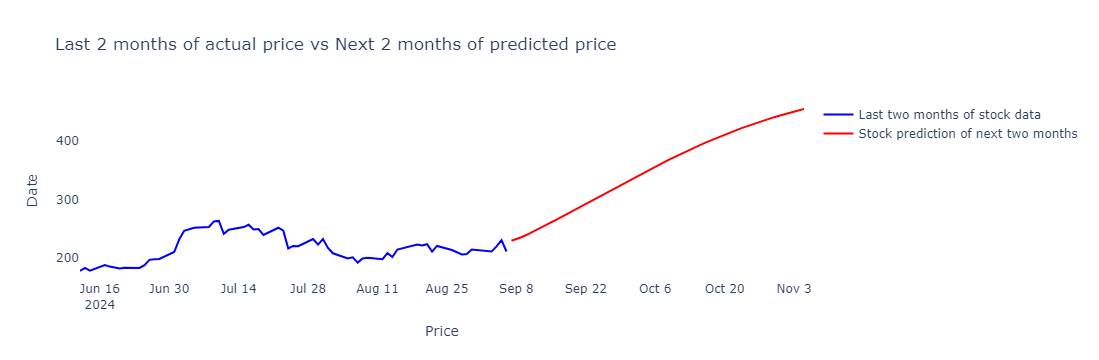

In [360]:
import plotly.graph_objects as go

# Create a figure 
fig = go.Figure()

# Add last two months of actual stock prices 

fig.add_trace(go.Scatter(
    x = last_2_months.index,
    y = last_2_months['Close'],
    mode = 'lines',
    name = 'Last two months of stock data',
    line = dict(color = 'blue')
))

# Add the predicted data for next two months 
fig.add_trace(go.Scatter(
    x = dataset_prediction.index,
    y = dataset_prediction['Predicted_close'],
    mode = 'lines',
    name = 'Stock prediction of next two months ',
     line = dict(color = 'red')
))

# Customize layout 
fig.update_layout(
    title = 'Last 2 months of actual price vs Next 2 months of predicted price',
    xaxis_title = 'Price',
    yaxis_title = 'Date',
    hovermode = 'x unified', # This will show all hovered data in a unified box 
    plot_bgcolor = 'rgba(0,0,0,0)',
    paper_bgcolor = 'rgba(0,0,0,0)',
)
fig.show()

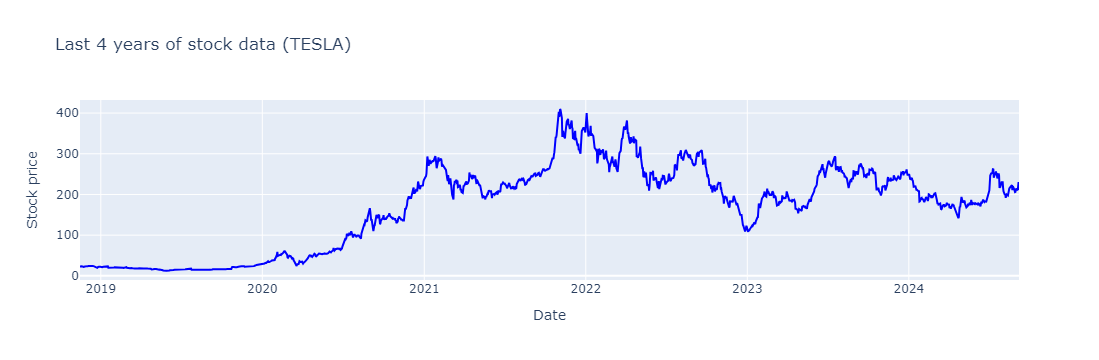

In [361]:
fig = go.Figure()
# Add last 4 years of stock prices 
last_data = df[-1460:]
fig.add_trace(go.Scatter(
    x = last_data.index,
    y = last_data['Close'],
    mode = 'lines',
    line = dict(color = 'blue'),
    name = '$'
))

# Customize layout 
fig.update_layout(
    title = 'Last 4 years of stock data (TESLA)',
    xaxis_title ='Date',
    yaxis_title = 'Stock price',
    hovermode = 'x unified',
)
fig.show()

In [362]:
dataa = predict_future(model,df[-1465:],365)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134m

In [363]:
dataa = scaler.inverse_transform(dataa.reshape(-1,1))

In [364]:
dataa

array([[1811.0457 ],
       [1669.8091 ],
       [1608.7979 ],
       [1567.5197 ],
       [1537.5969 ],
       [1515.804  ],
       [1499.1337 ],
       [1484.9491 ],
       [1471.0161 ],
       [1455.7906 ],
       [1437.8115 ],
       [1414.7866 ],
       [1385.2843 ],
       [1350.7438 ],
       [1314.0923 ],
       [1277.5999 ],
       [1241.2676 ],
       [1203.1013 ],
       [1161.3285 ],
       [1114.9121 ],
       [1063.5803 ],
       [1008.5673 ],
       [ 952.7401 ],
       [ 899.9185 ],
       [ 853.1677 ],
       [ 813.77686],
       [ 781.4769 ],
       [ 754.96173],
       [ 732.45374],
       [ 712.3521 ],
       [ 693.6083 ],
       [ 675.74634],
       [ 658.92883],
       [ 643.9745 ],
       [ 631.95184],
       [ 623.62177],
       [ 619.16077],
       [ 618.1796 ],
       [ 619.8712 ],
       [ 623.20526],
       [ 627.13556],
       [ 630.7794 ],
       [ 633.5159 ],
       [ 634.99634],
       [ 635.0974 ],
       [ 633.8563 ],
       [ 631.4106 ],
       [ 627.

In [365]:
dataa = np.array(dataa)

In [366]:
# Extract the last date from the dataframe
last_date = df.index[-1]

# Generate future dates for the next 365 days
future_dates = pd.date_range(start=last_date, periods=366, freq='D')[1:]

# Ensure 'dataa' matches the shape (365, 1)
if dataa.shape[0] == len(future_dates):
    dataa_f = pd.DataFrame(dataa, index=future_dates, columns=['Predicted_close'])
else:
    print(f"Shape mismatch: dataa.shape = {dataa.shape}, expected {len(future_dates)} rows")

In [367]:
# Add last 4 years of actual stock prices 
last_4years = df[-1460:]
last_4years.index

DatetimeIndex(['2018-11-15', '2018-11-16', '2018-11-19', '2018-11-20',
               '2018-11-21', '2018-11-23', '2018-11-26', '2018-11-27',
               '2018-11-28', '2018-11-29',
               ...
               '2024-08-23', '2024-08-26', '2024-08-27', '2024-08-28',
               '2024-08-29', '2024-08-30', '2024-09-03', '2024-09-04',
               '2024-09-05', '2024-09-06'],
              dtype='datetime64[ns]', name='Date', length=1460, freq=None)

In [368]:
dataa_f['Predicted_close']

2024-09-07    1811.045654
2024-09-08    1669.809082
2024-09-09    1608.797852
2024-09-10    1567.519653
2024-09-11    1537.596924
                 ...     
2025-09-02     502.982819
2025-09-03     502.982819
2025-09-04     502.982819
2025-09-05     502.982880
2025-09-06     502.982819
Freq: D, Name: Predicted_close, Length: 365, dtype: float32

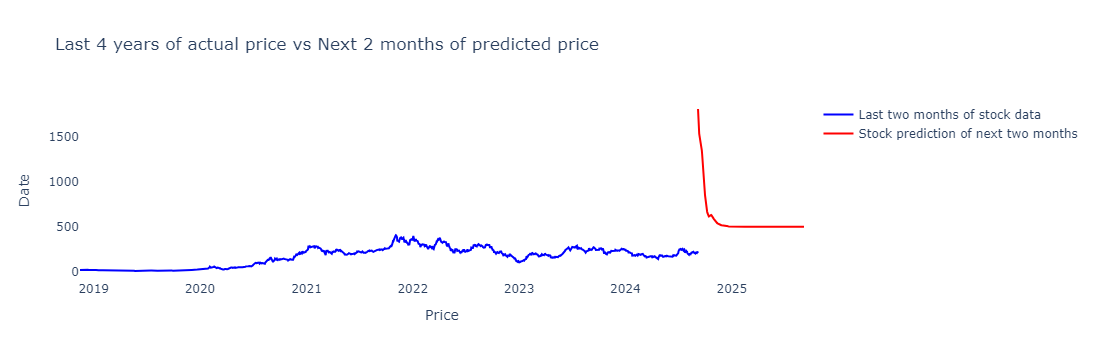

In [369]:
import plotly.graph_objects as go

# Create a figure 
fig = go.Figure()


fig.add_trace(go.Scatter(
    x = last_4years.index,
    y = last_4years['Close'],
    mode = 'lines',
    name = 'Last two months of stock data',
    line = dict(color = 'blue')
))

# Add the predicted data for next two months 
fig.add_trace(go.Scatter(
    x = dataa_f.index,
    y = dataa_f['Predicted_close'],
    mode = 'lines',
    name = 'Stock prediction of next two months ',
     line = dict(color = 'red')
))

# Customize layout 
fig.update_layout(
    title = 'Last 4 years of actual price vs Next 2 months of predicted price',
    xaxis_title = 'Price',
    yaxis_title = 'Date',
    hovermode = 'x unified', # This will show all hovered data in a unified box 
    plot_bgcolor = 'rgba(0,0,0,0)',
    paper_bgcolor = 'rgba(0,0,0,0)',
)
fig.show()